# Rf 1 0 7_Plotstyles
Basic functionality: demonstration of various plotting styles of data, functions in a RooPlot




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:41 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Set up model
---------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create Gaussian

In [3]:
sigma = ROOT.RooRealVar("sigma", "sigma", 3, 0.1, 10)
mean = ROOT.RooRealVar("mean", "mean", -3, -10, 10)
gauss = ROOT.RooGaussian("gauss", "gauss", x, mean, sigma)

Generate a sample of 100 events with sigma=3

In [4]:
data = gauss.generate(ROOT.RooArgSet(x), 100)

Fit pdf to data

In [5]:
gauss.fitTo(data)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean        -3.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        3.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=244.778 FROM MIGRAD    STATUS=INITIATE        6 CALLS           7 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

Make plot frames
-------------------------------

Make four plot frames to demonstrate various plotting features

In [6]:
frame1 = x.frame(ROOT.RooFit.Name("xframe"), ROOT.RooFit.Title(
    "Red Curve / SumW2 Histo errors"), ROOT.RooFit.Bins(20))
frame2 = x.frame(ROOT.RooFit.Name("xframe"), ROOT.RooFit.Title(
    "Dashed Curve / No XError bars"), ROOT.RooFit.Bins(20))
frame3 = x.frame(ROOT.RooFit.Name("xframe"), ROOT.RooFit.Title(
    "Filled Curve / Blue Histo"), ROOT.RooFit.Bins(20))
frame4 = x.frame(ROOT.RooFit.Name("xframe"), ROOT.RooFit.Title(
    "Partial Range / Filled Bar chart"), ROOT.RooFit.Bins(20))

Data plotting styles
---------------------------------------

Use sqrt(sum(weights^2)) error instead of Poisson errors

In [7]:
data.plotOn(frame1, ROOT.RooFit.DataError(ROOT.RooAbsData.SumW2))

<ROOT.RooPlot object ("xframe") at 0x55adffdf9eb0>

Remove horizontal error bars

In [8]:
data.plotOn(frame2, ROOT.RooFit.XErrorSize(0))

<ROOT.RooPlot object ("xframe") at 0x55adff9a64e0>

Blue markers and error bors

In [9]:
data.plotOn(frame3, ROOT.RooFit.MarkerColor(
    ROOT.kBlue), ROOT.RooFit.LineColor(ROOT.kBlue))

<ROOT.RooPlot object ("xframe") at 0x55adffd99230>

Filled bar chart

In [10]:
data.plotOn(
    frame4,
    ROOT.RooFit.DrawOption("B"),
    ROOT.RooFit.DataError(
        ROOT.RooAbsData.ErrorType(2)),
    ROOT.RooFit.XErrorSize(0),
    ROOT.RooFit.FillColor(
        ROOT.kGray))

<ROOT.RooPlot object ("xframe") at 0x55adffdd6f30>

Function plotting styles
-----------------------------------------------

Change line color to red

In [11]:
gauss.plotOn(frame1, ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("xframe") at 0x55adffdf9eb0>

Change line style to dashed

In [12]:
gauss.plotOn(frame2, ROOT.RooFit.LineStyle(ROOT.kDashed))

<ROOT.RooPlot object ("xframe") at 0x55adff9a64e0>

Filled shapes in green color

In [13]:
gauss.plotOn(frame3, ROOT.RooFit.DrawOption("F"),
             ROOT.RooFit.FillColor(ROOT.kOrange), ROOT.RooFit.MoveToBack())

<ROOT.RooPlot object ("xframe") at 0x55adffd99230>

In [14]:
gauss.plotOn(frame4, ROOT.RooFit.Range(-8, 3),
             ROOT.RooFit.LineColor(ROOT.kMagenta))

c = ROOT.TCanvas("rf107_plotstyles", "rf107_plotstyles", 800, 800)
c.Divide(2, 2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.6)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.6)
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.6)
frame3.Draw()
c.cd(4)
ROOT.gPad.SetLeftMargin(0.15)
frame4.GetYaxis().SetTitleOffset(1.6)
frame4.Draw()

c.SaveAs("rf107_plotstyles.png")

[#1] INFO:Plotting -- RooAbsPdf::plotOn(gauss) only plotting range [-8,3], curve is normalized to data in given given range
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'plotRange' created with bounds [-8,3]


Info in <TCanvas::Print>: png file rf107_plotstyles.png has been created


Draw all canvases 

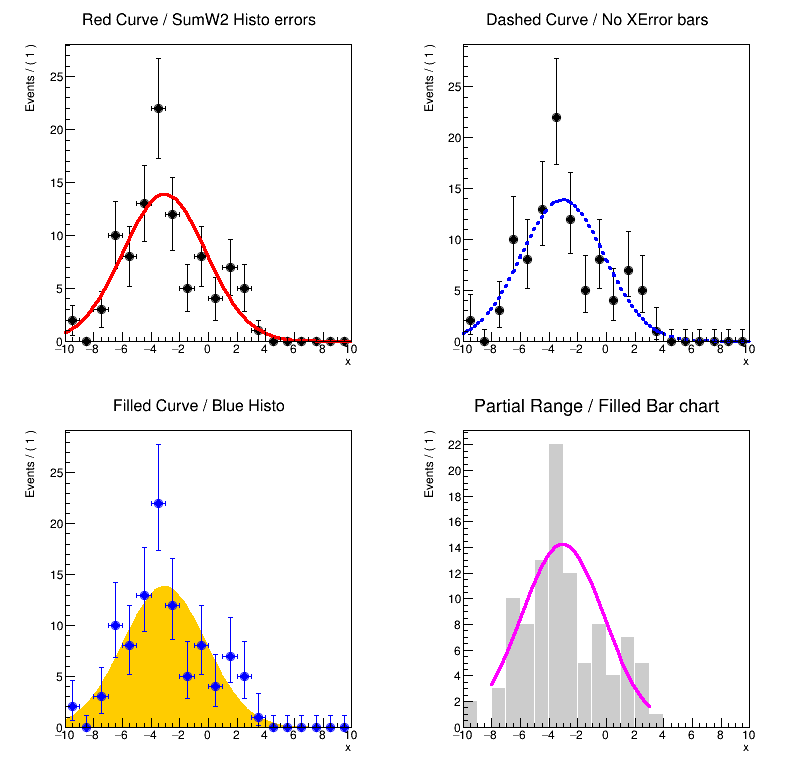

In [15]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()